# In this notebook, we will compare the preformance (accuracy) of models built

In [26]:
import torch
import torch.nn as nn

from pathlib import Path
MODELS_PATH = Path("../checkpoints")

import matplotlib.pyplot as plt

In [34]:
MODELS = []
state_dicts = []

MODEL_1_NAME = "PRIMITIVE_CNN.pt"
MODEL_1_PATH = MODELS_PATH/MODEL_1_NAME
state_dict_1 = torch.load(f=MODEL_1_PATH)
state_dicts.append(state_dict_1)
MODELS.append(MODEL_1_NAME)

MODEL_2_NAME = "CNN1_1.pt"
MODEL_2_PATH = MODELS_PATH/MODEL_2_NAME
state_dict_2 = torch.load(f=MODEL_2_PATH)
state_dicts.append(state_dict_2)
MODELS.append(MODEL_2_NAME)

MODEL_3_NAME = "CNN1_2.pt"
MODEL_3_PATH = MODELS_PATH/MODEL_3_NAME
state_dict_3 = torch.load(f=MODEL_3_PATH)
state_dicts.append(state_dict_3)
MODELS.append(MODEL_3_NAME)

MODEL_4_NAME = "CNN2_1.pt"
MODEL_4_PATH = MODELS_PATH/MODEL_4_NAME
state_dict_4 = torch.load(f=MODEL_4_PATH)
state_dicts.append(state_dict_4)
MODELS.append(MODEL_4_NAME)

MODEL_5_NAME = "CNN2_2.pt"
MODEL_5_PATH = MODELS_PATH/MODEL_5_NAME
state_dict_5 = torch.load(f=MODEL_5_PATH)
state_dicts.append(state_dict_5)
MODELS.append(MODEL_5_NAME)

MODEL_6_NAME = "CNN3_(0.7_dropout).pt"
MODEL_6_PATH = MODELS_PATH/MODEL_6_NAME
state_dict_6 = torch.load(f=MODEL_6_PATH)
state_dicts.append(state_dict_6)
MODELS.append(MODEL_6_NAME)

MODEL_7_NAME = "CNN3_(2x_bs_lr).pt"
MODEL_7_PATH = MODELS_PATH/MODEL_7_NAME
state_dict_7 = torch.load(f=MODEL_7_PATH)
state_dicts.append(state_dict_7)
MODELS.append(MODEL_7_NAME)

MODEL_8_NAME = "CNN3_(Batchsize128_LR0.004_40EPOCHS).pt"
MODEL_8_PATH = MODELS_PATH/MODEL_8_NAME
state_dict_8 = torch.load(f=MODEL_8_PATH)
state_dicts.append(state_dict_8)
MODELS.append(MODEL_8_NAME)

MODEL_9_NAME = "CNN3_1.pt"
MODEL_9_PATH = MODELS_PATH/MODEL_9_NAME
state_dict_9 = torch.load(f=MODEL_9_PATH)
state_dicts.append(state_dict_9)
MODELS.append(MODEL_9_NAME)

In [35]:
accuracies = []
for state_dict in state_dicts:
    accuracies.append(state_dict['accuracies'][-1])

In [36]:
accuracies

[0.9552666666666667,
 0.9696166666666667,
 0.9696166666666667,
 0.9986,
 0.9989166666666667,
 0.9889666666666667,
 0.9874833333333334,
 0.9846666666666667,
 0.995]

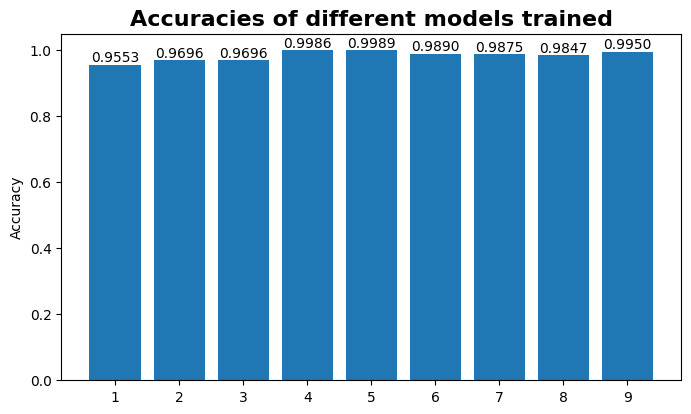

In [51]:
plt.figure(figsize=(8,4.5))
bars = plt.bar(range(1,len(accuracies)+1), accuracies)
plt.xticks(range(1,len(accuracies)+1))
plt.ylabel("Accuracy")
plt.title("Accuracies of different models trained", fontsize=16, fontweight="bold")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height, f'{height:.4f}', ha='center', va='bottom')

We see that most of the models perform well, with all of them achieving more than 95% accuracies.

In [56]:
# select best model
best_model_index = accuracies.index(max(accuracies))
best_model = MODELS[best_model_index]

print(f"The best model among the trained ones is {best_model}\nsaved in the '../checkpoints' directory")

The best model among the trained ones is CNN2_2.pt
saved in the '../checkpoints' directory


### save the best model as `best_model.pt`

In [58]:
print("Saving the best model selected...")

BEST_MODEL_NAME = "best_model.pt"
MODEL_SAVE_PATH = MODELS_PATH/BEST_MODEL_NAME
torch.save(obj=state_dicts[best_model_index],
           f=MODEL_SAVE_PATH)

print(f"Model saved successfully to {MODEL_SAVE_PATH}")

Saving the best model selected...
Model saved successfully to ../checkpoints/best_model.pt
